In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/raw_analyst_ratings.csv')

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [15]:
# null values
df.isnull().sum()

Unnamed: 0              0
headline                0
url                     0
publisher               0
date                    0
stock                   0
Headline Length         0
Publication Date    55987
dtype: int64

In [4]:
df['Headline Length'] = df['headline'].apply(lambda x: len(str(x)))

# Basic statistics
mean_length = np.mean(df['Headline Length'])
median_length = np.median(df['Headline Length'])
mode_length = df['Headline Length'].mode()[0]
std_dev = np.std(df['Headline Length'])
min_length = df['Headline Length'].min()
max_length = df['Headline Length'].max()

In [5]:
# Print statistics
print("Mean Headline Length:", mean_length)
print("Median Headline Length:", median_length)
print("Mode Headline Length:", mode_length)
print("Standard Deviation:", std_dev)
print("Min Length:", min_length)
print("Max Length:", max_length)

Mean Headline Length: 73.12051490484095
Median Headline Length: 64.0
Mode Headline Length: 47
Standard Deviation: 40.73529545937668
Min Length: 3
Max Length: 512


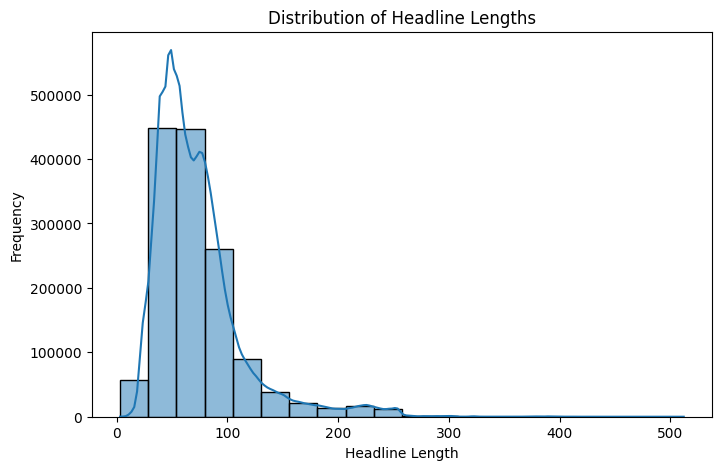

In [6]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Headline Length'], bins=20, kde=True)
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.title("Distribution of Headline Lengths")
plt.show()

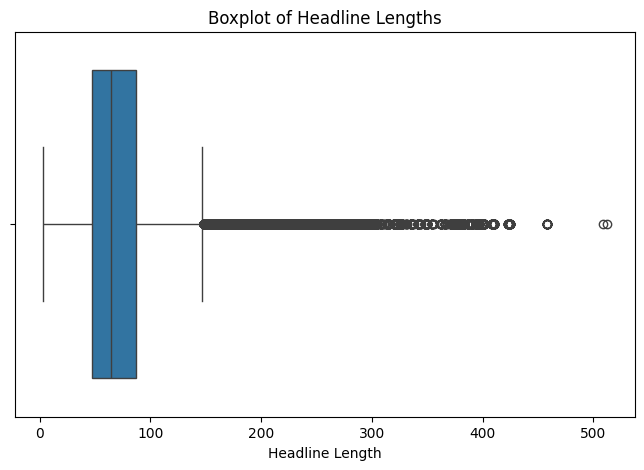

In [7]:
# Box plot for outlier detection
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Headline Length'])
plt.xlabel("Headline Length")
plt.title("Boxplot of Headline Lengths")
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


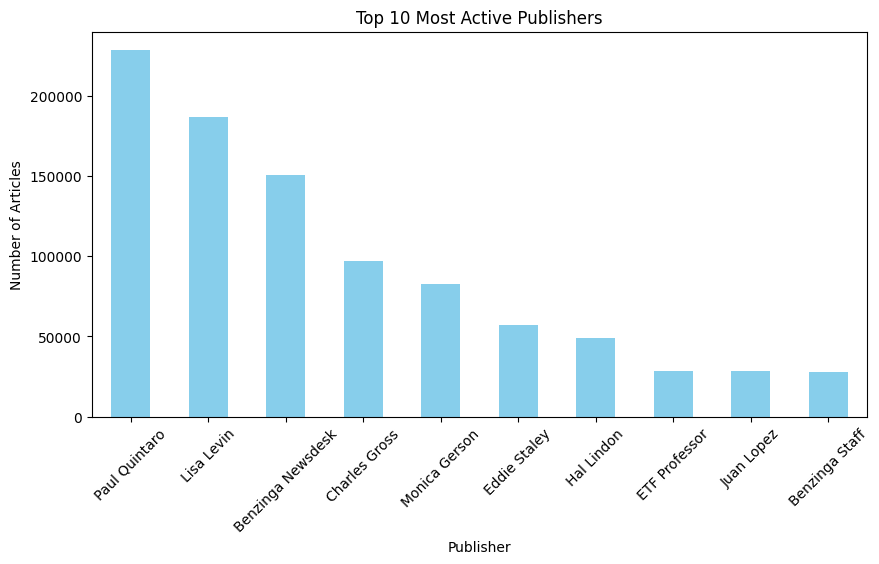

In [9]:
# Group by publisher and count articles
publisher_counts = df['publisher'].value_counts()

# Print the top publishers
print(publisher_counts.head(10))  # Show top 10 publishers

# Visualize with a bar chart
plt.figure(figsize=(10,5))
publisher_counts.head(10).plot(kind='bar', color='skyblue')  # Top 10 publishers
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.title("Top 10 Most Active Publishers")
plt.xticks(rotation=45)
plt.show()

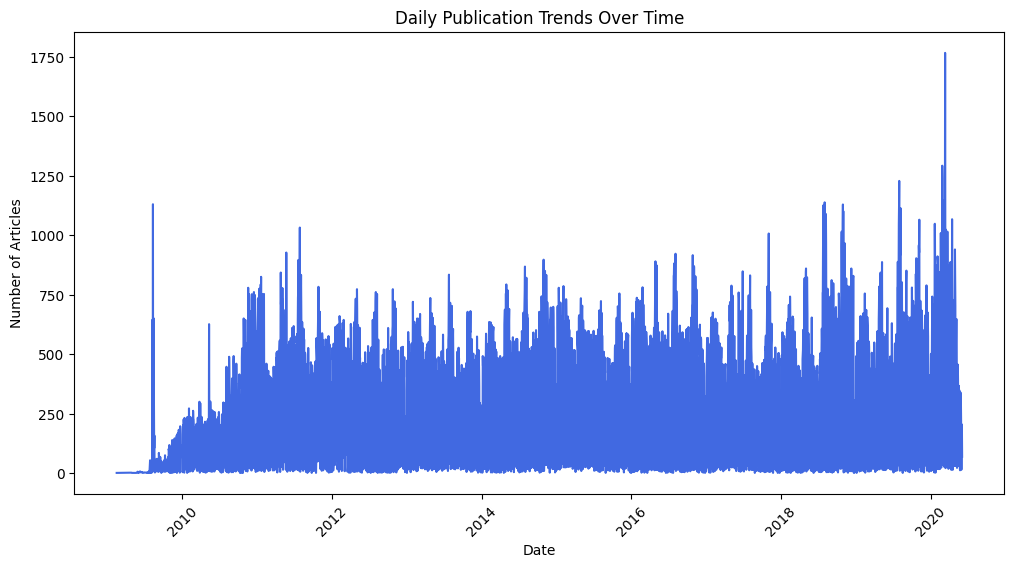

In [ ]:
df['Publication Date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Aggregate articles per day
daily_counts = df.groupby(df['Publication Date'].dt.date).size()

# Plot trends over time
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='royalblue')
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.title("Daily Publication Trends Over Time")
plt.xticks(rotation=45)
plt.show()

In [16]:
# coun null values of 'Publication Date'
print("Null values in 'Publication Date':", df['Publication Date'].isnull().sum())


Null values in 'Publication Date': 55987
